# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

# Read Dataset
***
**Dataset Filename**: datasets/week8-dataset/Uber

In [2]:
files = os.listdir('../datasets/week8-dataset/uber-traffic/')
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

kita akan fokus pada dataset pada tahun 2014 saja

In [3]:
files.remove('uber-raw-data-janjune-15.csv')

In [4]:
# import seluruh files dalam folder tersebut, merging menjadi 1 dataframe
uber_df = pd.DataFrame()
path = '../datasets/week8-dataset/uber-traffic/'
for file in files:
    df = pd.read_csv(path+file, encoding='utf-8')
    uber_df = pd.concat([df, uber_df])

In [5]:
uber_df.shape

(4534327, 4)

Ada **4 JUTA!!** lebih data, so huge!

In [6]:
uber_df.head()

Date/Time      Lat      Lon    Base
0  9/1/2014 0:01:00  40.2201 -74.0021  B02512
1  9/1/2014 0:01:00  40.7500 -74.0027  B02512
2  9/1/2014 0:03:00  40.7559 -73.9864  B02512
3  9/1/2014 0:06:00  40.7450 -73.9889  B02512
4  9/1/2014 0:11:00  40.8145 -73.9444  B02512

**Penjelasan Kolom** <br>
***
- Lat: Lintang titik penjemputan Uber
- Lon: Longitude titik penjemputan Uber
- Base: Kode perusahaan basis TLC yang berafiliasi dengan titik penjemputan

In [7]:
# copy dataframe
uber_df_copy = uber_df.copy()

# Data Cleaning and Preprocessing

## Perbaiki tipe data sesuai isinya
***
Ubah kolom **Date/Time** ke tipe data date

In [8]:
uber_df_copy['Date/Time'] = pd.to_datetime(uber_df_copy['Date/Time'], format='%m/%d/%Y %H:%M:%S')
uber_df_copy.head()

Date/Time      Lat      Lon    Base
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512

## Create new date attributes columns
***
1. Weekdays name
2. Day
3. Minute
4. Month
5. Hour

In [9]:
uber_df_copy['Weekday'] = uber_df_copy['Date/Time'].dt.day_name()
uber_df_copy['Day'] = uber_df_copy['Date/Time'].dt.day
uber_df_copy['Minute'] = uber_df_copy['Date/Time'].dt.minute
uber_df_copy['Month'] = uber_df_copy['Date/Time'].dt.month
uber_df_copy['Hour'] = uber_df_copy['Date/Time'].dt.hour

In [10]:
uber_df_copy.dtypes 

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
Weekday              object
Day                   int32
Minute                int32
Month                 int32
Hour                  int32
dtype: object

# Project Data Analysis II
***
Dalam project ini, kita akan menganalisa dan visualisasi traffic uber: <br>
1. Heatmap berdasarkan jam dan hari kerja
2. Heatmap berdasarkan jam dan hari
3. Heatmap berdasarkan bulan dan hari
4. Heatmap berdasarkan bulan dan hari kerja

In [11]:
uber_df_copy

Date/Time      Lat      Lon    Base    Weekday  Day  Minute   
0      2014-09-01 00:01:00  40.2201 -74.0021  B02512     Monday    1       1  \
1      2014-09-01 00:01:00  40.7500 -74.0027  B02512     Monday    1       1   
2      2014-09-01 00:03:00  40.7559 -73.9864  B02512     Monday    1       3   
3      2014-09-01 00:06:00  40.7450 -73.9889  B02512     Monday    1       6   
4      2014-09-01 00:11:00  40.8145 -73.9444  B02512     Monday    1      11   
...                    ...      ...      ...     ...        ...  ...     ...   
564511 2014-04-30 23:22:00  40.7640 -73.9744  B02764  Wednesday   30      22   
564512 2014-04-30 23:26:00  40.7629 -73.9672  B02764  Wednesday   30      26   
564513 2014-04-30 23:31:00  40.7443 -73.9889  B02764  Wednesday   30      31   
564514 2014-04-30 23:32:00  40.6756 -73.9405  B02764  Wednesday   30      32   
564515 2014-04-30 23:48:00  40.6880 -73.9608  B02764  Wednesday   30      48   

        Month  Hour  
0           9     0  
1           9     0  
2           9     0  
3           9     0  
4           9     0  
...       ...   ...  
564511      4    23  
564512      4    23  
564513      4    23  
564514      4    23  
564515      4    23  

[4534327 rows x 9 columns]

## Analisa 1: Tampilkan kepadatan traffic uber berdasarkan jam dan nama hari kerja
***
Untuk analisa ini kita memerlukan pivot table <br>
**Pivot Table** : A Pivot Table is used to summarise, sort, reorganise, group, count, total or average data stored in a table. It allows us to transform columns into rows and rows into columns. It allows grouping by any field (column), and using advanced calculations on them.

In [12]:
uber_df_copy.groupby(['Weekday', 'Hour'], group_keys=True).apply(lambda x: x.sample(1))

Date/Time      Lat      Lon    Base   
Weekday   Hour                                                        
Friday    0    493065 2014-06-06 00:04:00  40.6464 -73.7902  B02682  \
          1    457010 2014-04-18 01:04:00  40.7422 -74.0045  B02682   
          2    989205 2014-09-26 02:53:00  40.7223 -73.9578  B02764   
          3    428743 2014-07-18 03:55:00  40.7838 -73.9502  B02617   
          4    340589 2014-08-08 04:03:00  40.6632 -73.8428  B02617   
...                                   ...      ...      ...     ...   
Wednesday 19   721721 2014-08-20 19:45:00  40.7198 -74.0002  B02682   
          20   268922 2014-07-30 20:12:00  40.7125 -73.9646  B02598   
          21   760051 2014-08-27 21:53:00  40.7363 -73.9934  B02682   
          22   114596 2014-09-10 22:40:00  40.7466 -73.9870  B02598   
          23   766610 2014-09-17 23:11:00  40.7204 -74.0010  B02682   

                         Weekday  Day  Minute  Month  Hour  
Weekday   Hour                                              
Friday    0    493065     Friday    6       4      6     0  
          1    457010     Friday   18       4      4     1  
          2    989205     Friday   26      53      9     2  
          3    428743     Friday   18      55      7     3  
          4    340589     Friday    8       3      8     4  
...                          ...  ...     ...    ...   ...  
Wednesday 19   721721  Wednesday   20      45      8    19  
          20   268922  Wednesday   30      12      7    20  
          21   760051  Wednesday   27      53      8    21  
          22   114596  Wednesday   10      40      9    22  
          23   766610  Wednesday   17      11      9    23  

[168 rows x 9 columns]

In [13]:
# hitung ada berapa banyak data pada masing-masing group
def count_rows(rows):
    return len(rows)
by_cross = uber_df_copy.groupby(['Weekday', 'Hour']).apply(count_rows)

In [14]:
by_cross

Weekday    Hour
Friday     0       13716
           1        8163
           2        5350
           3        6930
           4        8806
                   ...  
Wednesday  19      47017
           20      47772
           21      44553
           22      32868
           23      18146
Length: 168, dtype: int64

### stack() and unstack()

In [15]:
pivot = by_cross.unstack()
pivot

Hour          0      1      2      3     4      5      6      7      8    
Weekday                                                                   
Friday     13716   8163   5350   6930  8806  13450  23412  32061  31509  \
Monday      6436   3737   2938   6232  9640  15032  23746  31159  29265   
Saturday   27633  19189  12710   9542  6846   7084   8579  11014  14411   
Sunday     32877  23015  15436  10597  6374   6169   6596   8728  12128   
Thursday    9293   5290   3719   5637  8505  14169  27065  37038  35431   
Tuesday     6237   3509   2571   4494  7548  14241  26872  36599  33934   
Wednesday   7644   4324   3141   4855  7511  13794  26943  36495  33826   

Hour          9   ...     14     15     16     17     18     19     20     21   
Weekday           ...                                                           
Friday     25230  ...  36206  43673  48169  51961  54762  49595  43542  48323  \
Monday     22197  ...  28157  32744  38770  42023  37000  34159  32849  28925   
Saturday   17669  ...  31418  38769  43512  42844  45883  41098  38714  43826   
Sunday     16401  ...  28151  31112  33038  31521  28291  25948  25076  23967   
Thursday   27812  ...  36699  44442  50560  56704  55825  51907  51990  51953   
Tuesday    25023  ...  34846  41338  48667  55500  50186  44789  44661  39913   
Wednesday  25635  ...  35148  43388  50684  55637  52732  47017  47772  44553   

Hour          22     23  
Weekday                  
Friday     49409  41260  
Monday     20158  11811  
Saturday   47951  43174  
Sunday     19566  12166  
Thursday   44194  27764  
Tuesday    27712  14869  
Wednesday  32868  18146  

[7 rows x 24 columns]

### Heatmap Plot
***
Parameter pada heatmap yaitu berupa data pivot

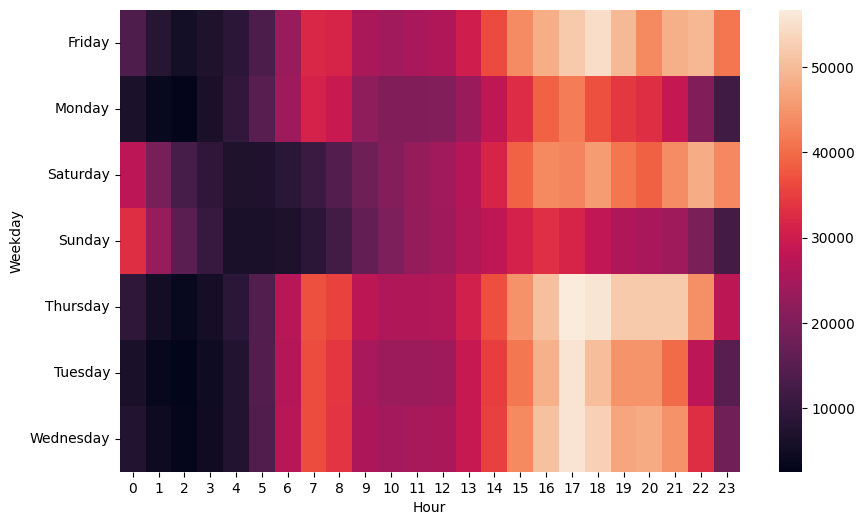

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot,annot=False)
plt.show()

**ANALYSIS AND INTERPRETATIONS!**
***
- Heatmap merupakan representasi data grafik yang menggunakan warna untuk memvisualisasikan nilai matriks suatu data
- Warna yang lebih terang mewakili nilai yang lebih umum atau aktivitas yang lebih tinggi, sedangkan nilai yang kurang umum atau aktivitas yang lebih rendah diwakili oleh warna yang lebih gelap

Interpretations: <br>
1. Warna hitam gelap menunjukkan jumlah perjalanan uber hingga 10.000
2. Warna cerah ke arah putih, menunjukkan jumlah perjalanan uber hingga lebih dari 50.000

### Quiz!
***
Tampilkan kepadatan uber berdasarkan variasi tanggal dan variasi bulan

In [17]:
def heatmap(col1, col2, df):
    by_cross = df.groupby([col1, col2]).apply(lambda x: len(x))
    pivot = by_cross.unstack()
    plt.figure(figsize=(10,8))
    return sns.heatmap(pivot,annot=False)

<Axes: xlabel='Month', ylabel='Day'>

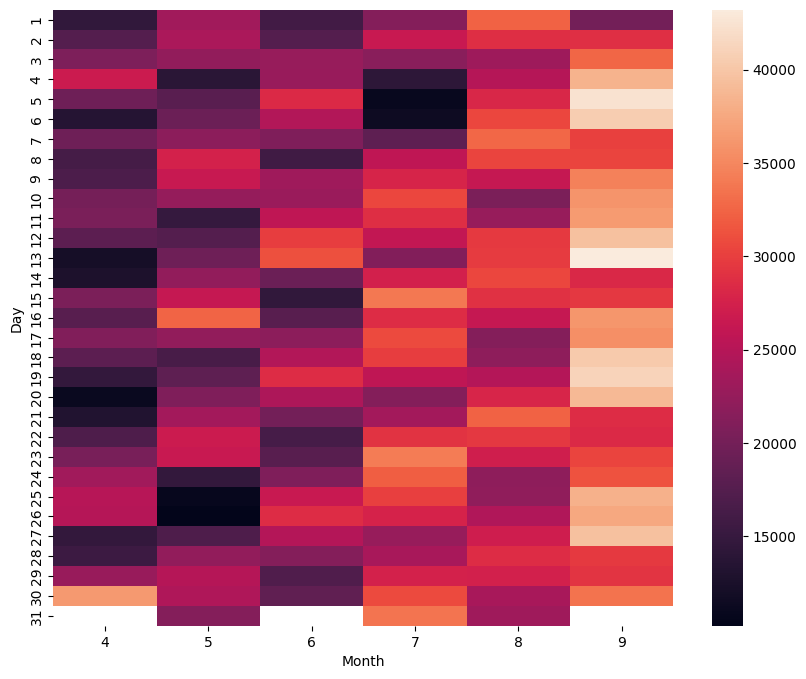

In [18]:
heatmap('Day', 'Month', uber_df_copy)

**Interpretations** <br>
1. Jumlah perjalanan uber meningkat setiap bulannya

<Axes: xlabel='Month', ylabel='Weekday'>

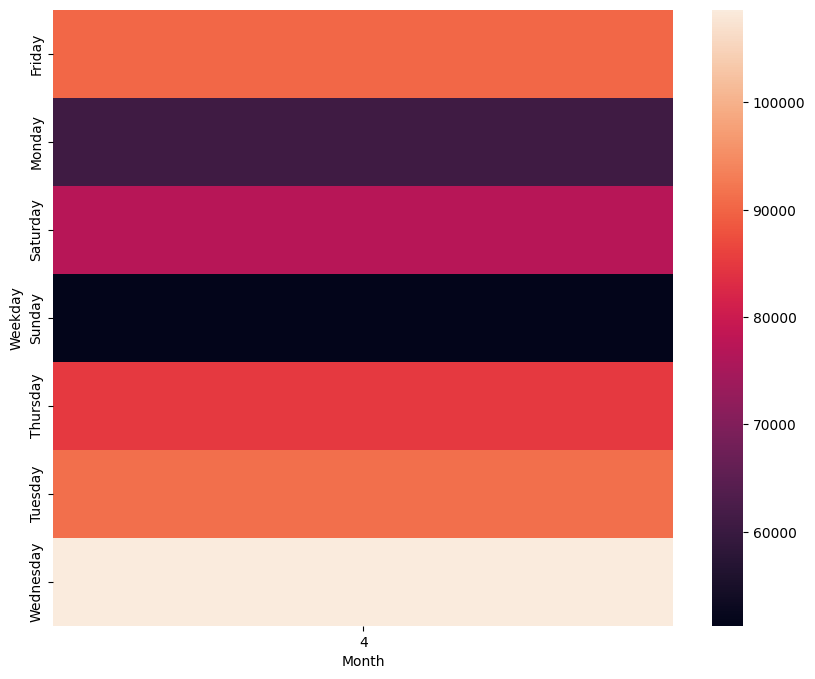

In [19]:
# tampilkan kepadatan penggunaan uber pada bulan ke-4 berdasarkan variasi hari dan bulan
selected_df = uber_df_copy[
    uber_df_copy['Month']==4
]
heatmap('Weekday', 'Month', selected_df)

## Analisa 2: Mapping kepadatan traffic uber berdasarkan lokasi (Lat, Lang)
***
Parameter yang dilewatkan pada plot(): <br>
1. b+: dot akan ditampilkan warna biru dengan tanda +
2. ms: markersize
3. xlim: set range (bottom, top) untuk x axis
4. ylim: set rang(bottom, top) untuk y axis

(40.0729, 42.1166)

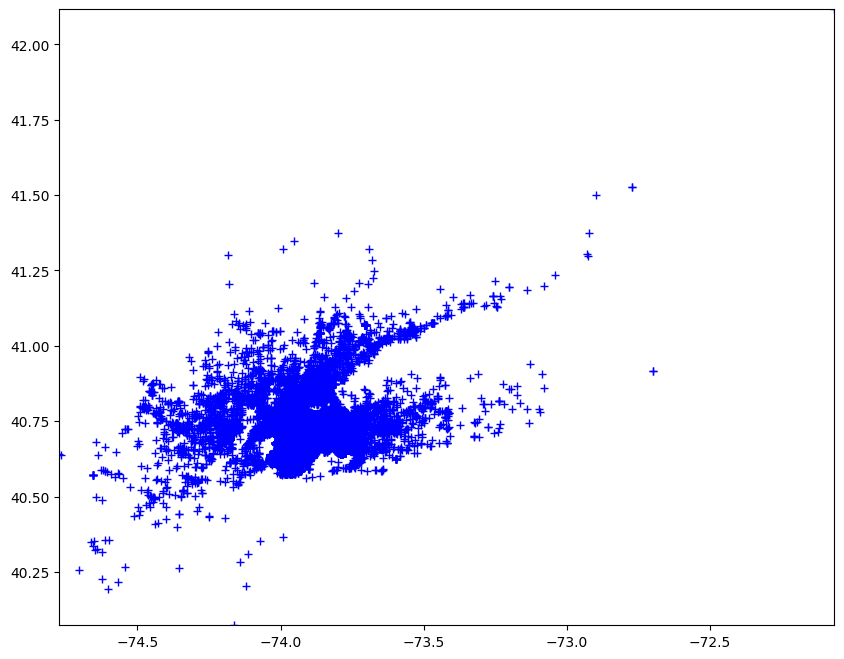

In [20]:
plt.figure(figsize=(10,8))

data_sumbu_x = selected_df['Lon']
data_sumbu_y = selected_df['Lat']


plt.plot(data_sumbu_x, data_sumbu_y, 'b+')
plt.xlim(data_sumbu_x.min(), data_sumbu_x.max())
plt.ylim(data_sumbu_y.min(), data_sumbu_y.max())

### Analisis spasial
***
Analisis pada contoh ini digunakan untuk mendapatkan trafix uber hanya di weekend (Sunday)

In [21]:
selected_df = uber_df_copy[
    uber_df_copy['Weekday']=='Sunday'
]
selected_df.head()

Date/Time      Lat      Lon    Base Weekday  Day  Minute   
8011 2014-09-07 00:00:00  40.7341 -74.0005  B02512  Sunday    7       0  \
8012 2014-09-07 00:00:00  40.7344 -73.9900  B02512  Sunday    7       0   
8013 2014-09-07 00:00:00  40.7806 -73.9582  B02512  Sunday    7       0   
8014 2014-09-07 00:01:00  40.7293 -73.9859  B02512  Sunday    7       1   
8015 2014-09-07 00:01:00  40.7713 -74.0133  B02512  Sunday    7       1   

      Month  Hour  
8011      9     0  
8012      9     0  
8013      9     0  
8014      9     0  
8015      9     0

Untuk menampilkan spatial map, kita menggunakan heatmap dari plugin **Follium** <br>

**Follium Heatmap Parameter** <br>
1. Input data yang diterima harus dalam bentuk list [Long, Lat] dengan index angka
2. zoom: level zoom
3. radius: radius setiap point dengan heatmap (ukuran lingkaran)

In [22]:
from folium.plugins import HeatMap
from folium import Map

In [23]:
# buat objek dari kelas Map untuk menampung spatial Map nantinya
basemap = Map()

In [24]:
# buat data yang akan ditampilkan
data_folium = selected_df.groupby(['Lat', 'Lon'])['Weekday'].count().reset_index()
data_folium

Lat      Lon  Weekday
0       39.9374 -74.0722        1
1       39.9378 -74.0721        1
2       39.9384 -74.0742        1
3       39.9385 -74.0734        1
4       39.9415 -74.0736        1
...         ...      ...      ...
209225  41.3141 -74.1249        1
209226  41.3180 -74.1298        1
209227  41.3195 -73.6905        1
209228  41.3197 -73.6903        1
209229  42.1166 -72.0666        1

[209230 rows x 3 columns]

In [25]:
# create HeatMap dan tambahkank ke objek dari kelas Map yang sudah dibuat
HeatMap(data_folium, zoom=20, radius=15).add_to(basemap)

In [26]:
#tampilkan basemap
basemap

# Assignment [Project Data Analysis II]

## Analisa 1
***
Kita akan menganalisa data dari file **uber-raw-data-janjune15.csv**

In [27]:
# load dataset
uber_raw_analisa1 = pd.read_csv('../datasets/uber-raw-data-janjune-15.csv')
uber_raw_analisa1

Dispatching_base_num          Pickup_date Affiliated_base_num   
0                      B02617  2015-05-17 09:47:00              B02617  \
1                      B02617  2015-05-17 09:47:00              B02617   
2                      B02617  2015-05-17 09:47:00              B02617   
3                      B02617  2015-05-17 09:47:00              B02774   
4                      B02617  2015-05-17 09:47:00              B02617   
...                       ...                  ...                 ...   
14270474               B02765  2015-05-08 15:43:00              B02765   
14270475               B02765  2015-05-08 15:43:00              B02765   
14270476               B02765  2015-05-08 15:43:00              B02765   
14270477               B02765  2015-05-08 15:44:00              B01899   
14270478               B02765  2015-05-08 15:44:00              B02682   

          locationID  
0                141  
1                 65  
2                100  
3                 80  
4                 90  
...              ...  
14270474         186  
14270475         263  
14270476          90  
14270477          45  
14270478         144  

[14270479 rows x 4 columns]

In [59]:
uber_raw_analisa1_copy = uber_raw_analisa1.sample(10000)

### Soal nomor 1
***
- Tampilkan tanggal Pickup Date terkecil

In [60]:
uber_raw_analisa1_copy.sort_values('Pickup_date').reset_index().loc[0]['Pickup_date']

'2015-01-01 00:25:30'

In [61]:
uber_raw_analisa1_copy['Pickup_date'].min()

'2015-01-01 00:25:30'

### Soal nomor 2
***
- Tampilkan tanggal Pickup Date terbesar

In [62]:
uber_raw_analisa1_copy['Pickup_date'].max()

'2015-06-30 23:35:00'

### Soal nomor 3
***
- Ubah kolom Pickup_date ke datetime dan tambahkan column nama_hari, bulan, tanggal, jam, menit, detik

In [63]:
# ubah ke datetime
uber_raw_analisa1_copy['datetime'] = pd.to_datetime(uber_raw_analisa1_copy['Pickup_date'], format='%Y-%m-%d %H:%M:%S')

# tambahkan informasi nama hari, bulan, tanggal, jam, menit, detik
uber_raw_analisa1_copy['Month'] = uber_raw_analisa1_copy['datetime'].dt.month
uber_raw_analisa1_copy['Weekday'] = uber_raw_analisa1_copy['datetime'].dt.day_name()
uber_raw_analisa1_copy['Day'] = uber_raw_analisa1_copy['datetime'].dt.day
uber_raw_analisa1_copy['Hour'] = uber_raw_analisa1_copy['datetime'].dt.hour
uber_raw_analisa1_copy['Minute'] = uber_raw_analisa1_copy['datetime'].dt.minute
uber_raw_analisa1_copy['Seconds'] = uber_raw_analisa1_copy['datetime'].dt.second

In [64]:
uber_raw_analisa1_copy

Dispatching_base_num          Pickup_date Affiliated_base_num   
2506971                B02682  2015-02-19 22:40:32              B02682  \
11191957               B02682  2015-03-21 15:37:00              B02682   
5951979                B02682  2015-04-25 11:02:00              B02682   
6089115                B02764  2015-03-20 17:31:00              B00296   
8300267                B02512  2015-05-24 00:48:00              B02598   
...                       ...                  ...                 ...   
2459372                B02682  2015-02-19 22:34:25              B02682   
13254619               B02765  2015-06-10 11:12:00              B02764   
4905787                B02764  2015-05-30 01:05:00              B02764   
2867896                B02764  2015-05-16 21:13:00              B02764   
8561543                B02598  2015-05-14 22:36:00              B02764   

          locationID            datetime  Month    Weekday  Day  Hour  Minute   
2506971          186 2015-02-19 22:40:32      2   Thursday   19    22      40  \
11191957         181 2015-03-21 15:37:00      3   Saturday   21    15      37   
5951979          231 2015-04-25 11:02:00      4   Saturday   25    11       2   
6089115          261 2015-03-20 17:31:00      3     Friday   20    17      31   
8300267           90 2015-05-24 00:48:00      5     Sunday   24     0      48   
...              ...                 ...    ...        ...  ...   ...     ...   
2459372          237 2015-02-19 22:34:25      2   Thursday   19    22      34   
13254619         263 2015-06-10 11:12:00      6  Wednesday   10    11      12   
4905787          161 2015-05-30 01:05:00      5   Saturday   30     1       5   
2867896          234 2015-05-16 21:13:00      5   Saturday   16    21      13   
8561543          164 2015-05-14 22:36:00      5   Thursday   14    22      36   

          Seconds  
2506971        32  
11191957        0  
5951979         0  
6089115         0  
8300267         0  
...           ...  
2459372        25  
13254619        0  
4905787         0  
2867896         0  
8561543         0  

[10000 rows x 11 columns]

### Soal nomor 4
***
- Tampilkan dalam grafik bar jumlah traffic uber per bulannya

<Axes: xlabel='Month'>

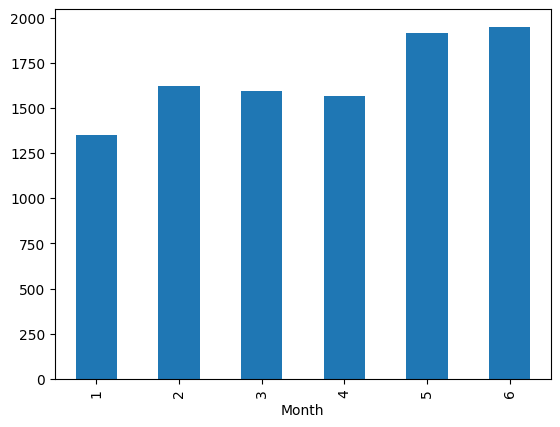

In [68]:
uber_raw_analisa1_copy.groupby(['Month']).apply(lambda x: len(x)).plot(kind='bar')

### Soal nomor 5
***
- Tampilkan jumlah traffic uber setiap jamnya (0-23)

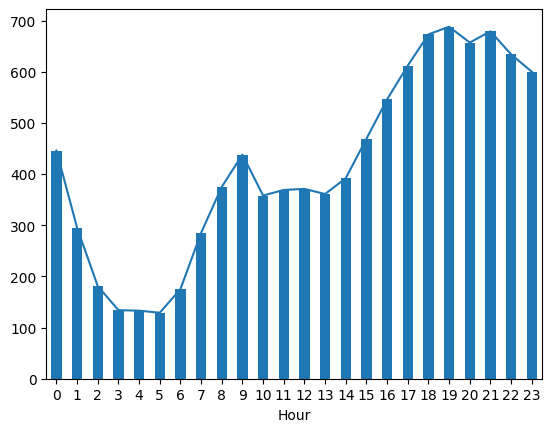

In [71]:
uber_raw_analisa1_copy.groupby(['Hour']).apply(lambda x: len(x)).plot(kind='bar')
uber_raw_analisa1_copy.groupby(['Hour']).apply(lambda x: len(x)).plot()
plt.show()

### Soal nomor 6
***
- Analisa lebih dalam untuk melihat apakah ada perbedaan pola traffic uber per jam untuk tiap hari yang berbeda dalam seminggu. Tampilkan dalam pointplot dengan warna garis yang berbeda untuk masing-masing hari

***
**Hints** <br>
- Sumbu x: per jam berbeda
- Sumbu y: jumlah penggunaan uber per jam
- Legend plot: hari berbeda

#### Point Plot
***
A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars.
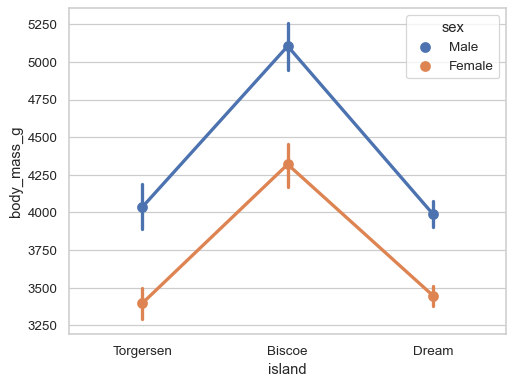

In [72]:
from seaborn import pointplot

In [102]:
# buat dataframe yang akan ditampilkan ke pointplot
df = uber_raw_analisa1_copy.groupby(['Hour','Weekday'],group_keys=True).count()['Pickup_date'].reset_index()

# ganti nama kolom Pickup_date dengan count
df.rename({'Pickup_date':'count'},axis=1,inplace=True)
df

Hour    Weekday  count
0       0     Friday     74
1       0     Monday     31
2       0   Saturday    119
3       0     Sunday    126
4       0   Thursday     39
..    ...        ...    ...
163    23   Saturday    122
164    23     Sunday     61
165    23   Thursday     88
166    23    Tuesday     76
167    23  Wednesday     80

[168 rows x 3 columns]

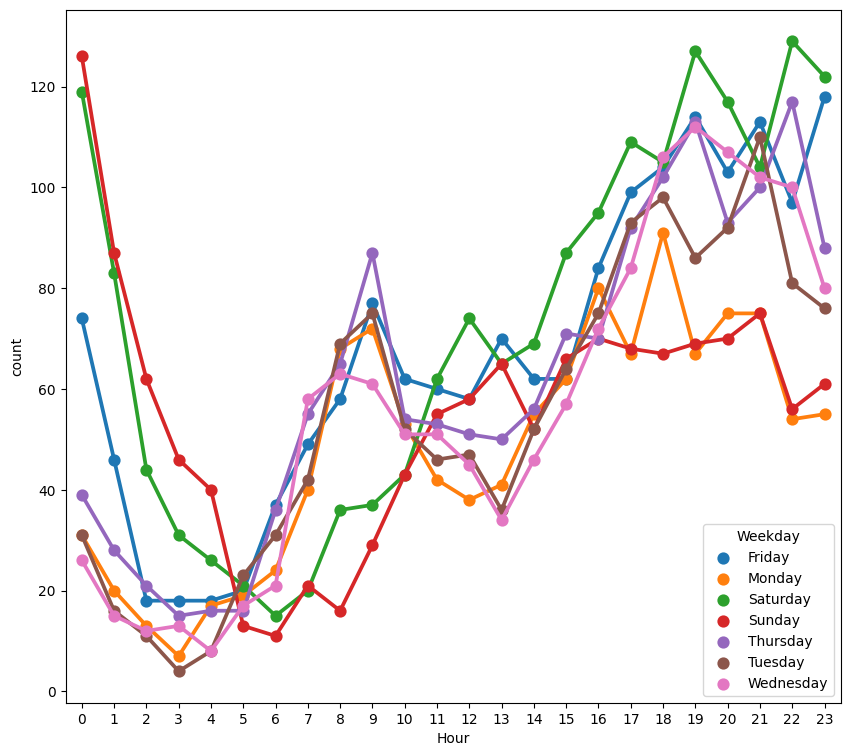

In [105]:
plt.figure(figsize=(10,9))
sns.pointplot(data=df, x="Hour", y="count", hue="Weekday")
plt.show()

## Analisa 2
***
Kita akan menganalisa data dari file **Uber-Jan-Feb-FOIL.csv**

In [106]:
uber_raw_analisa2 = pd.read_csv('../datasets/Uber-Jan-Feb-FOIL.csv')
uber_raw_analisa2

dispatching_base_number       date  active_vehicles  trips
0                    B02512   1/1/2015              190   1132
1                    B02765   1/1/2015              225   1765
2                    B02764   1/1/2015             3427  29421
3                    B02682   1/1/2015              945   7679
4                    B02617   1/1/2015             1228   9537
..                      ...        ...              ...    ...
349                  B02764  2/28/2015             3952  39812
350                  B02617  2/28/2015             1372  14022
351                  B02682  2/28/2015             1386  14472
352                  B02512  2/28/2015              230   1803
353                  B02765  2/28/2015              747   7753

[354 rows x 4 columns]

### Soal nomor 1
***
- Tampilkan list basenumber yang tersedia

In [108]:
uber_raw_analisa2['dispatching_base_number'].value_counts()

dispatching_base_number
B02512    59
B02765    59
B02764    59
B02682    59
B02617    59
B02598    59
Name: count, dtype: int64

### Soal nomor 2
***
- Tampilkan Basenumber mana yang paling banyak kendaraan aktif. Gunakan boxplot untuk menampilkan distribusi data
***
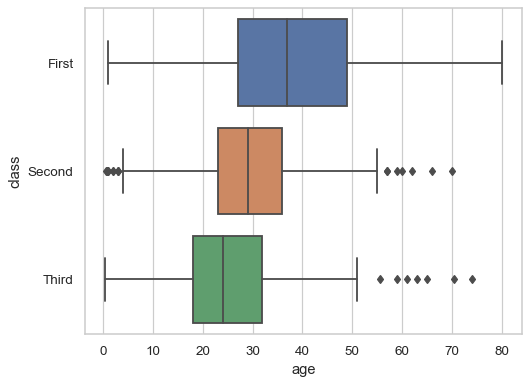

<Axes: xlabel='active_vehicles', ylabel='dispatching_base_number'>

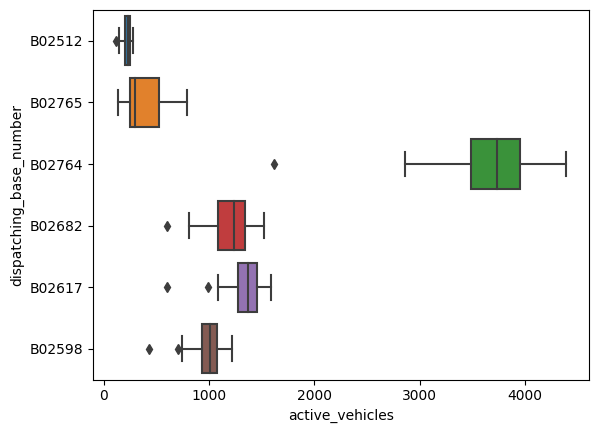

In [113]:
sns.boxplot(data=uber_raw_analisa2, x="active_vehicles", y="dispatching_base_number")

### Soal nomor 3
***
Tampilkan jumlah perjalanan dari masing-masing basenumber

<Figure size 1000x900 with 0 Axes>

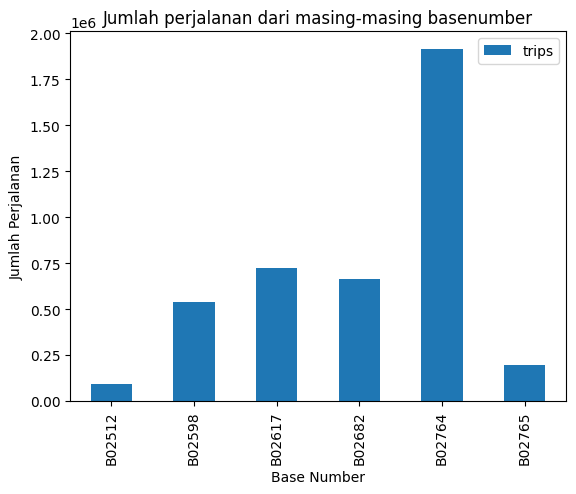

In [116]:
plt.figure(figsize=(10,9))
uber_raw_analisa2.groupby('dispatching_base_number')[['trips']].sum().plot(kind='bar')
plt.title('Jumlah perjalanan dari masing-masing basenumber')
plt.ylabel('Jumlah Perjalanan')
plt.xlabel('Base Number')
plt.show()

### Soal nomor 4
***
- Analisa berapa rata-rata jumlah perjalanan per kendaraan (basenumber) berdasarkan tanggal

In [149]:
# ubah ke datetime
uber_raw_analisa2['datetime'] = pd.to_datetime(uber_raw_analisa2['date'], format='%m/%d/%Y')

# tambahkan informasi nama hari, bulan, tanggal, jam, menit, detik
uber_raw_analisa2['Month'] = uber_raw_analisa2['datetime'].dt.month
uber_raw_analisa2['Weekday'] = uber_raw_analisa2['datetime'].dt.day_name()
uber_raw_analisa2['Date'] = uber_raw_analisa2['datetime'].dt.day

In [151]:
df = uber_raw_analisa2.groupby(['Date','dispatching_base_number'],group_keys=False)['trips'].mean()
df = df.unstack()
df

dispatching_base_number  B02512   B02598   B02617   B02682   B02764  B02765
Date                                                                       
1                        1254.5   8201.0  11497.5  10057.5  33444.5  2218.5
2                        1389.5   7139.5   9640.5   8743.5  25367.5  1804.0
3                        1501.5   8517.0  11664.5   9982.5  30685.0  1968.0
4                        1215.0   7411.5   9844.0   8465.0  25217.5  1663.5
5                        1503.0   8703.5  11199.0   9897.0  28458.0  2072.0
6                        1651.5   9356.5  12772.5  10933.0  31997.0  2472.5
7                        1475.0   9454.5  12608.0  11264.0  34239.5  2588.5
8                        1484.0   9089.5  12233.0  10386.0  31747.0  2267.0
9                        1562.5   8836.5  12026.0  10343.0  30891.5  2466.5
10                       1600.5   9502.5  12628.5  11082.5  33994.0  2817.0
11                       1467.5   8605.0  11840.5  10325.0  29785.0  2725.0
12                       1745.5   9777.5  12462.5  11446.5  31848.0  3160.0
13                       2030.0  10887.5  14410.5  12858.5  36772.0  3803.0
14                       1818.5  10774.0  14482.0  13105.0  37704.0  3953.5
15                       1816.0  10334.5  13600.5  12454.0  36211.5  3648.5
16                       1528.5   9445.0  12400.5  11301.5  34135.0  3478.5
17                       1539.0   9504.5  12600.0  11634.5  34395.5  3533.5
18                       1555.0   9490.5  12447.5  11442.5  33749.5  3673.0
19                       1572.5   8674.0  11262.5  10809.5  30930.0  4007.5
20                       1845.0   9982.0  13435.5  12419.0  35446.0  4716.0
21                       1834.0  10086.5  13547.5  12810.5  35769.0  4716.0
22                       1431.5   8675.5  11419.5  10834.5  30124.0  3536.0
23                       1757.0   9143.0  12420.5  11740.5  32464.5  3992.5
24                       1738.5   9997.0  13931.0  12926.0  36936.5  4383.0
25                       1418.5   8312.0  11586.5  10998.0  30011.5  3966.5
26                       1398.5   8290.0  11034.5  10689.5  28015.5  4053.5
27                       1342.5   6856.0   9501.0   9694.5  25389.0  4242.0
28                       1620.5   9195.0  12442.0  12248.5  33974.5  4833.0
29                       1687.0   9499.0  12600.0  11485.0  31637.0  2086.0
30                       2016.0  11167.0  14793.0  13852.0  39110.0  2785.0
31                       1892.0  11642.0  15756.0  15388.0  44297.0  3282.0